In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')
from scipy import stats

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ : Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

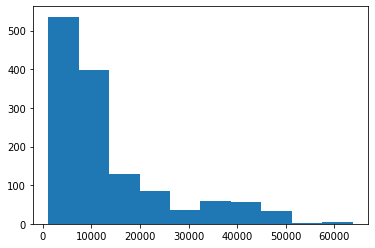

In [4]:
plt.hist(medical['charges'])

In [5]:
mean=np.mean(medical['charges'])
std=np.std(medical['charges'])
print(mean, std)

13270.422265141257 12105.484975561605


__Q2:__ :The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

Answer: Z-test is best here to give us the answer whether the average charge has fallen below 12000. 

__Q3:__ : Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the 95% confidence interval for the mean and comment on whether the administrator should be concerned?



In [8]:
margin=1.96*(std/np.sqrt(1388))
CI=(mean-margin,mean+margin)
print(CI)

(12633.562912094509, 13907.281618188004)


Answer: since the 95% confidence interval is between about 12633 to 13907, the administrator should not be concern that the average charges has fallen below 12000 since it is not within the confidence interval. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

Answer: N_0: the difference of means =0 N_A= the difference of mean !=0. we are assuming that the variance of both population is equal. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [43]:
t1=medical[medical['insuranceclaim']==0]
t2=medical[medical['insuranceclaim']==1]
mean_t1=np.mean(t1['charges'])
mean_t2=np.mean(t2['charges'])
v1=np.var(t1['charges'])
v2=np.var(t2['charges'])
n1=len(t1['charges'])
n2=len(t2['charges'])
sp = np.sqrt(((n1-1)*v1+(n2-1)*v2)/(n1+n2-2))
t=(mean_t1-mean_t2)/(sp*np.sqrt((1/n1)+(1/n2)))
DF=((v1/n1+v2/n2)**2)/((((v1/n1)**2)/(n1-1))+(((v2/n2)**2)/(n2-1)))
p_value=0
print('t='+str(t),'p-value='+str(p_value))

t=-11.901306943555385 p-value=0


In [23]:
answer=stats.ttest_ind(t1['charges'],t2['charges'])
answer

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

__Q6:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

In [44]:
answer2=stats.ttest_ind(t1['charges'],t2['charges'],equal_var=False)
answer2

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

__Q7:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

Answer: there is no equivalent function to ttest_ind for z-test because z-test is use to compare sample mean to the true mean of a population and t-test is use to test the significant difference of means from two indepedent samples. 